In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df : 원본 데이터 
df0 : preprocessing 완료 
df1 : 탐색적 분석  (현황 0,1,2 구분) 
df2 : autoencoder를 위해 (현황 0,1로 구분, 사유 drop)

### 원본 데이터

In [2]:
df=pd.read_excel('departure_data.xlsx')
df

,날짜,항공사,편명,출발공항코드,출발공항명,도착공항코드,도착공항명,계획시간,예상시간,출발시간,시간,온도,시정,전운량,최저운고,풍속,강수량(mm),구분,현황,사유
0,2017-01-01,아시아나항공,OZ286,ICN,인천,SFO,샌프란시스코,00:05,23:40,00:07,00:00,0.2,450,2,30.0,2,0.0,화물,출발,NaN
1,2017-01-01,에미레이트항공,EK323,ICN,인천,DXB,두바이,00:10,23:50,00:40,00:00,0.2,450,2,30.0,2,0.0,여객,출발,NaN
2,2017-01-01,아시아나항공,OZ2041,ICN,인천,LAX,로스앤젤레스,00:10,23:50,00:28,00:00,0.2,450,2,30.0,2,0.0,여객,출발,NaN
3,2017-01-01,싱가폴항공,SQ007,ICN,인천,SIN,싱가포르,00:25,00:36,00:35,00:00,0.2,450,2,30.0,2,0.0,여객,출발,NaN
4,2017-01-01,터키항공,TK91,ICN,인천,IST,아타튀르크,00:40,00:40,01:01,00:00,0.2,450,2,30.0,2,0.0,여객,출발,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585021,2019-12-31,아시아나항공,OZ286,ICN,인천,SFO,샌프란시스코,23:30,23:30,23:42,23:00,-4.1,1000,8,30.0,3,0.0,화물,출발,NaN
585022,2019-12-31,대한항공,KE319,ICN,인천,CAN,광저우,23:35,23:35,23:33,23:00,-4.1,1000,8,30.0,3,0.0,화물,출발,NaN
585023,2019-12-31,필리핀에어아시아,Z27047,ICN,인천,CEB,세부,23:50,23:50,23:54,23:00,-4.1,1000,8,30.0,3,0.0,여객,출발,NaN
585024,2019-12-31,산동항공,SC4722,ICN,인천,TAO,청도,23:50,23:50,23:56,23:00,-4.1,1000,8,30.0,3,0.0,여객,출발,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585026 entries, 0 to 585025
Data columns (total 20 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   날짜       585026 non-null  datetime64[ns]
 1   항공사      584988 non-null  object        
 2   편명       585026 non-null  object        
 3   출발공항코드   585026 non-null  object        
 4   출발공항명    585026 non-null  object        
 5   도착공항코드   585026 non-null  object        
 6   도착공항명    584755 non-null  object        
 7   계획시간     585026 non-null  object        
 8   예상시간     585026 non-null  object        
 9   출발시간     585026 non-null  object        
 10  시간       585026 non-null  object        
 11  온도       585026 non-null  float64       
 12  시정       585026 non-null  int64         
 13  전운량      585026 non-null  int64         
 14  최저운고     424971 non-null  float64       
 15  풍속       585026 non-null  int64         
 16  강수량(mm)  579479 non-null  float64       
 17  구분       5

In [4]:
df.describe()

,온도,시정,전운량,최저운고,풍속,강수량(mm)
count,585026.000000,585026.000000,585026.000000,424971.000000,585026.000000,579479.000000
mean,13.444535,871.096917,3.692998,70.025023,7.619113,0.125439
std,10.633179,243.177671,3.057657,70.023903,4.142155,1.326404
min,-16.000000,5.000000,0.000000,1.000000,0.000000,0.000000
25%,4.500000,800.000000,0.000000,25.000000,5.000000,0.000000
50%,14.600000,1000.000000,3.000000,30.000000,7.000000,0.000000
75%,22.600000,1000.000000,7.000000,120.000000,10.000000,0.000000
max,36.600000,1000.000000,8.000000,230.000000,49.000000,74.500000


In [5]:
df['현황'].groupby(df['현황']).count()

현황
기상 지연      4918
기상 취소       471
기상 회항        19
지연        46125
출발       531708
취소          598
회항          162
Name: 현황, dtype: int64

# Preprocessing

In [6]:
df0=df.copy()
#필요없는 열 모두 삭제
df0.drop(['날짜','항공사','편명','출발공항명','출발공항코드','도착공항코드','도착공항명',
                     '계획시간','출발시간','예상시간','시간','구분'], axis=1,inplace=True)

#필요없는 행 모두 삭제
df0 = df0[(df0['현황'] != '회항')]
df0 = df0[(df0['현황'] != '기상 회항')]
df0 = df0[(df0['현황'] != '취소')]
df0 = df0[(df0['현황'] != '지연')]
df0 = df0.dropna(subset=['현황'])  #1025개의 null값 삭제
df0

,온도,시정,전운량,최저운고,풍속,강수량(mm),현황,사유
0,0.2,450,2,30.0,2,0.0,출발,NaN
1,0.2,450,2,30.0,2,0.0,출발,NaN
2,0.2,450,2,30.0,2,0.0,출발,NaN
3,0.2,450,2,30.0,2,0.0,출발,NaN
4,0.2,450,2,30.0,2,0.0,출발,NaN
...,...,...,...,...,...,...,...,...
585021,-4.1,1000,8,30.0,3,0.0,출발,NaN
585022,-4.1,1000,8,30.0,3,0.0,출발,NaN
585023,-4.1,1000,8,30.0,3,0.0,출발,NaN
585024,-4.1,1000,8,30.0,3,0.0,출발,NaN


In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537097 entries, 0 to 585025
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   온도       537097 non-null  float64
 1   시정       537097 non-null  int64  
 2   전운량      537097 non-null  int64  
 3   최저운고     388310 non-null  float64
 4   풍속       537097 non-null  int64  
 5   강수량(mm)  531977 non-null  float64
 6   현황       537097 non-null  object 
 7   사유       5389 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 36.9+ MB


In [8]:
df0['현황'].groupby(df0['현황']).count()

현황
기상 지연      4918
기상 취소       471
출발       531708
Name: 현황, dtype: int64

In [9]:
df0.isnull().sum()

온도              0
시정              0
전운량             0
최저운고       148787
풍속              0
강수량(mm)      5120
현황              0
사유         531708
dtype: int64

### 결측치 파악
결측치는 최저운고에서 148787개 ,강수량에서 5120개 ,사유에서 531708개이다.   
(#현황은 원래 1025개의 null값을 가졌는데 중요한 변수이기 때문에 모두 drop하였다. 아래 결과는 현황의 null값 drop 후 결과이다.)

1) 최고 운고는 결측치가 148787개나 되는데 그중 출발과 관련된게 148189개 ,지연과 관련있는게 528개이고 결항과 관련된거는 없어서 크게 영향이 없을것으로 예상된다.
2) 강수량에서 결측치가 5120개인데 그중 출발과 관련해서 5103, 지연은 13개 결항은 없으므로 크게 null 값이 크게 영향이 없을것으로 예상된다.
3) 사유가 null값인 것이 531708인데 전부 출발에 대한 null값이기 때문에 분석을 진행하는데 이상 없을 것으로 예상된다.
4) 사용 코드 : df0['사유'][df0['현황']=='출발'].isnull().sum()

변수에 영향을 주는 null값이 100개 이하의 적은 값이기 때문에 0으로 결측치를 해결하였다.

In [10]:
# Missing Value 모두 0 대체 (결측치 해결)
df0['최저운고'].fillna(0, inplace=True)
df0['강수량(mm)'].fillna(0, inplace=True)

In [11]:
df0.describe()

,온도,시정,전운량,최저운고,풍속,강수량(mm)
count,537097.000000,537097.000000,537097.000000,537097.000000,537097.000000,537097.000000
mean,13.465720,873.989689,3.663778,51.391149,7.594546,0.110030
std,10.528253,240.232930,3.053906,67.761624,4.124790,1.215932
min,-16.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,4.600000,900.000000,0.000000,0.000000,5.000000,0.000000
50%,14.600000,1000.000000,3.000000,30.000000,7.000000,0.000000
75%,22.500000,1000.000000,7.000000,45.000000,10.000000,0.000000
max,36.600000,1000.000000,8.000000,230.000000,49.000000,74.500000


# 데이터 탐색적 분석

In [12]:
df1=df0.copy()

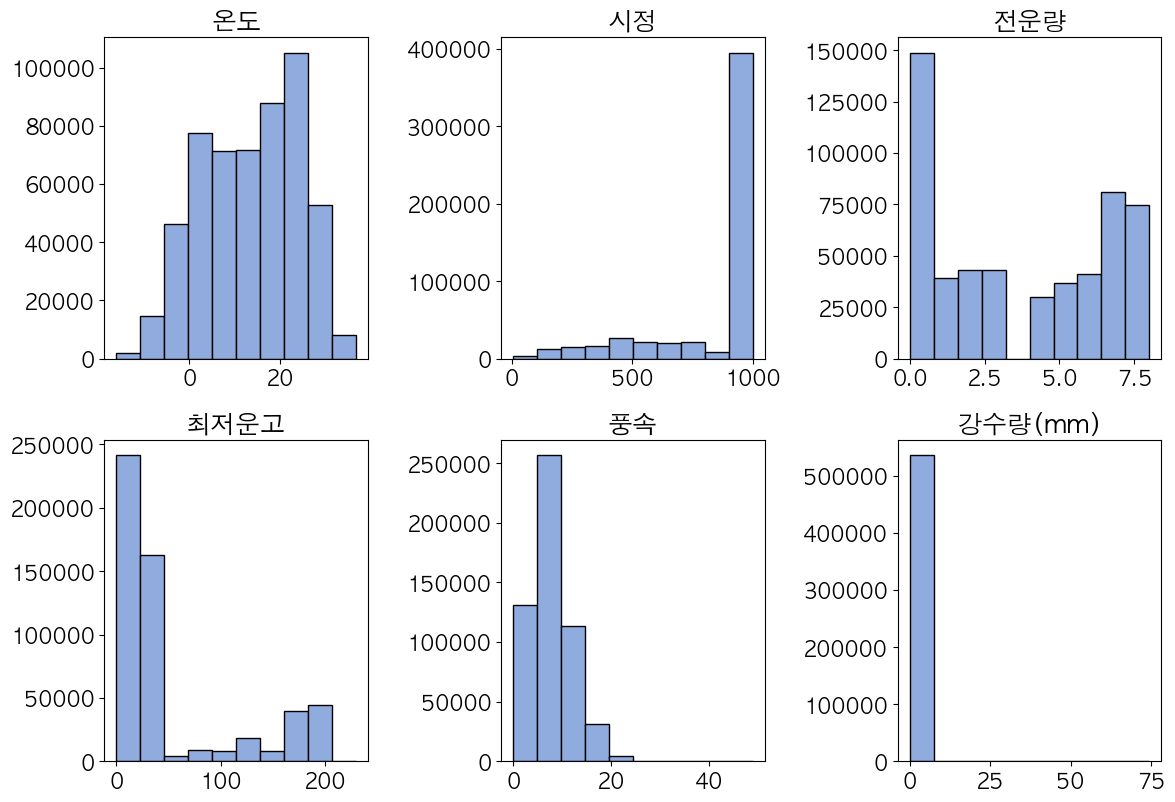

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 15


# 새로운 그림(figure) 생성과 크기 설정
plt.figure(figsize=(12, 12))

# 서브플롯 생성
bin = [10, 10, 10, 10, 10, 10, 2]  
for index, value in enumerate(df0.columns[:-2]):
    sub = plt.subplot(3, 3, index + 1)
    
    sub.hist([df0[value]], bins=bin[index], facecolor=(144/255, 171/255, 221/255),
             linewidth=1, edgecolor='black')
    plt.title(value)
    plt.tight_layout()  # 서브플롯 간 간격을 자동 조정해주는 함수

# 그림 표시
plt.show()

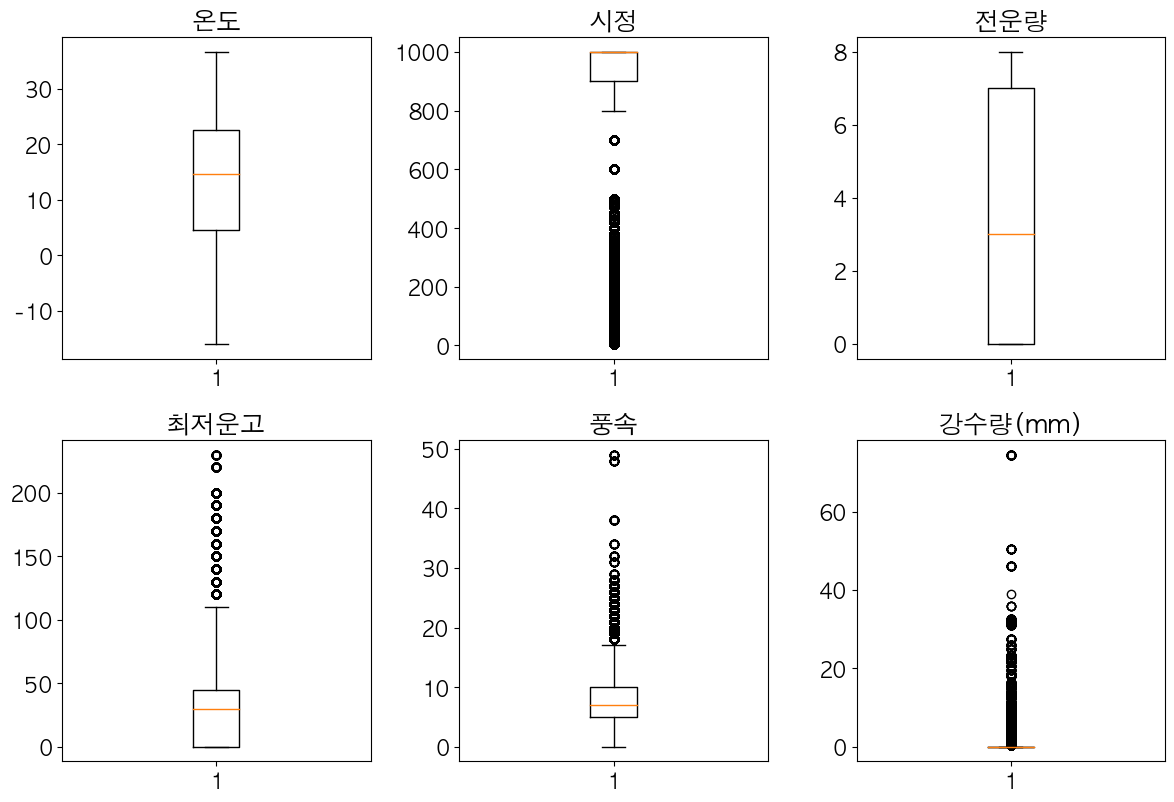

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 새로운 그림(figure) 생성과 크기 설정
plt.figure(figsize=(12, 12))

# 서브플롯 생성

for index, value in enumerate(df0.columns[:-2]):
    sub = plt.subplot(3, 3, index + 1)
    
    sub.boxplot([df0[value]])
    plt.title(value)
    plt.tight_layout()  # 서브플롯 간 간격을 자동 조정해주는 함수

# 그림 표시
plt.show() 

In [15]:
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.formula.api as smf
import statsmodels

In [16]:
df1['현황']=df1['현황'].replace('출발',0).replace('기상 지연',1).replace('기상 취소',2)

model_ = sm.OLS(endog=df1['현황'], exog=df1['온도'])
results_ = model_.fit() 
print(results_.summary())

model2_ = sm.OLS(endog=df1['현황'], exog=df1['시정'])
results2_ = model2_.fit() 
print(results2_.summary())

model3_ = sm.OLS(endog=df1['현황'], exog=df1['전운량'])
results3_ = model3_.fit() 
print(results3_.summary())

model4_ = sm.OLS(endog=df1['현황'], exog=df1['최저운고'])
results4_ = model4_.fit() 
print(results4_.summary())

model5_ = sm.OLS(endog=df1['현황'], exog=df1['풍속'])
results5_ = model5_.fit() 
print(results5_.summary())

model6_ = sm.OLS(endog=df1['현황'], exog=df1['강수량(mm)'])
results6_ = model6_.fit() 
print(results6_.summary())

model7_ = sm.OLS(endog=df1['현황'], exog=df1[['온도','시정','전운량','최저운고','풍속','강수량(mm)']])
results7_ = model7_.fit() 
print(results7_.summary())

                                 OLS Regression Results                                
Dep. Variable:                     현황   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              1212.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):                   2.96e-265
Time:                        02:47:31   Log-Likelihood:                      4.1178e+05
No. Observations:              537097   AIC:                                 -8.235e+05
Df Residuals:                  537096   BIC:                                 -8.235e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                                 OLS Regression Results                                
Dep. Variable:                     현황   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              1034.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):                   1.11e-226
Time:                        02:47:31   Log-Likelihood:                      4.1169e+05
No. Observations:              537097   AIC:                                 -8.234e+05
Df Residuals:                  537096   BIC:                                 -8.234e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### autoencoder를 위해 0,1로 구분 
+ 사유 drop

In [17]:
df2=df0.copy()

In [18]:
df2['현황']=df2['현황'].replace('출발',0).replace(['기상 지연','기상 취소'],1)
df2.drop(['사유'], axis=1,inplace=True)

In [19]:
df2

,온도,시정,전운량,최저운고,풍속,강수량(mm),현황
0,0.2,450,2,30.0,2,0.0,0
1,0.2,450,2,30.0,2,0.0,0
2,0.2,450,2,30.0,2,0.0,0
3,0.2,450,2,30.0,2,0.0,0
4,0.2,450,2,30.0,2,0.0,0
...,...,...,...,...,...,...,...
585021,-4.1,1000,8,30.0,3,0.0,0
585022,-4.1,1000,8,30.0,3,0.0,0
585023,-4.1,1000,8,30.0,3,0.0,0
585024,-4.1,1000,8,30.0,3,0.0,0


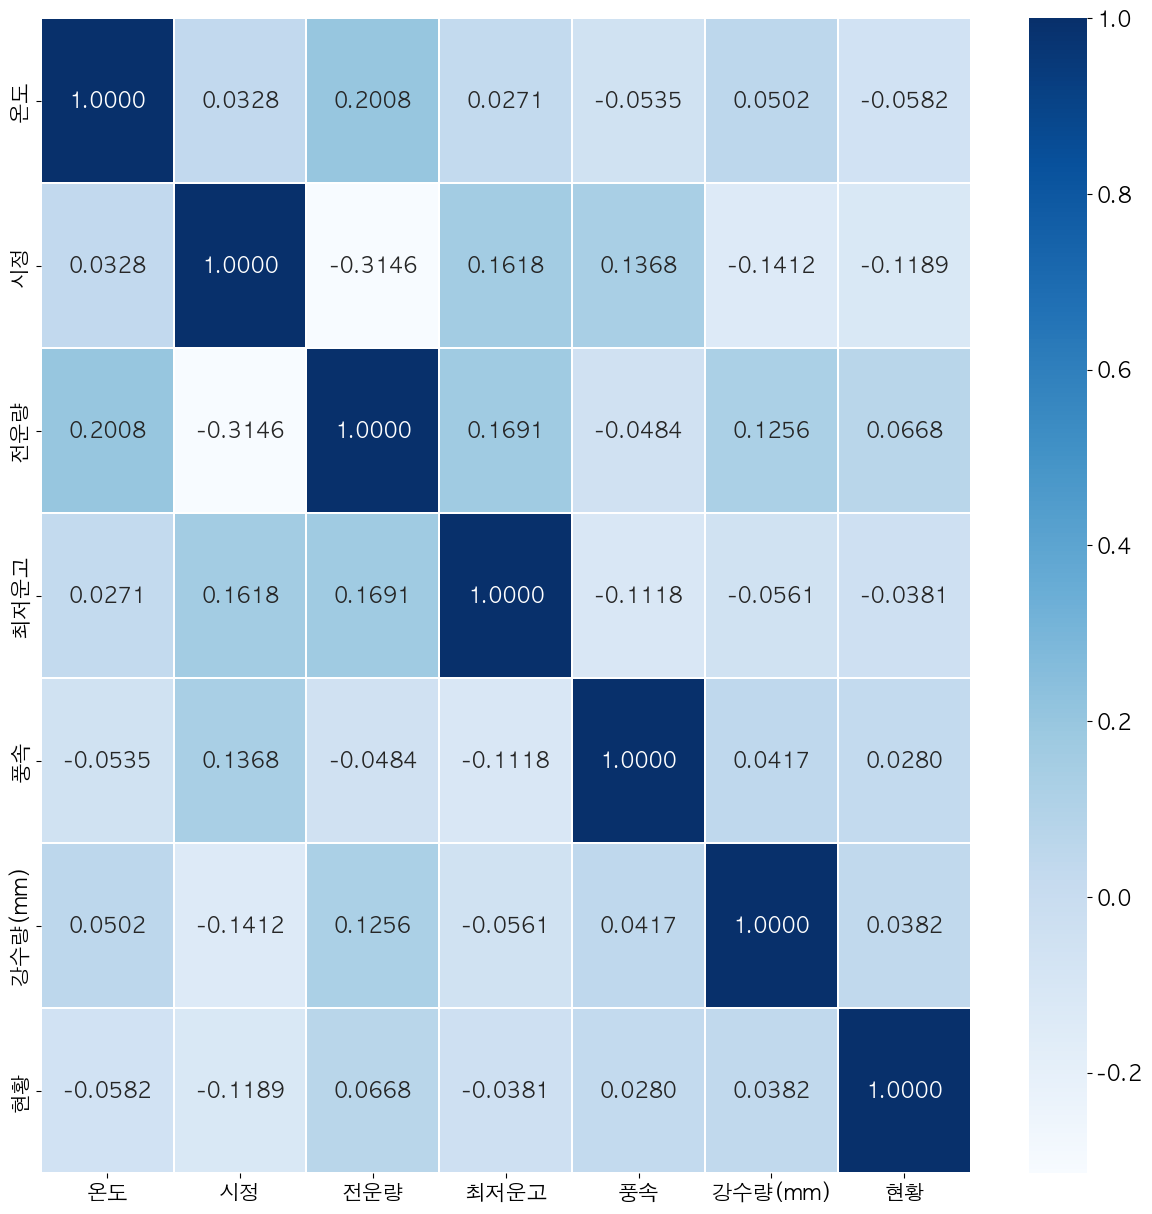

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 15

plt.subplots(figsize=(15,15))
annot_font_size = 15
sns.heatmap(data=df2.corr(),linewidths=0.1,annot=True,fmt='.4f',cmap='Blues',annot_kws={"size": annot_font_size})
plt.show()

데이터가 너무 커서 오래걸리기 때문에 처음 돌린 결과를 사진으로 첨부함
'
sns.set(style='ticks')
plt.figure(figsize=(20,20))
sns.pairplot(df2, hue='현황')
'
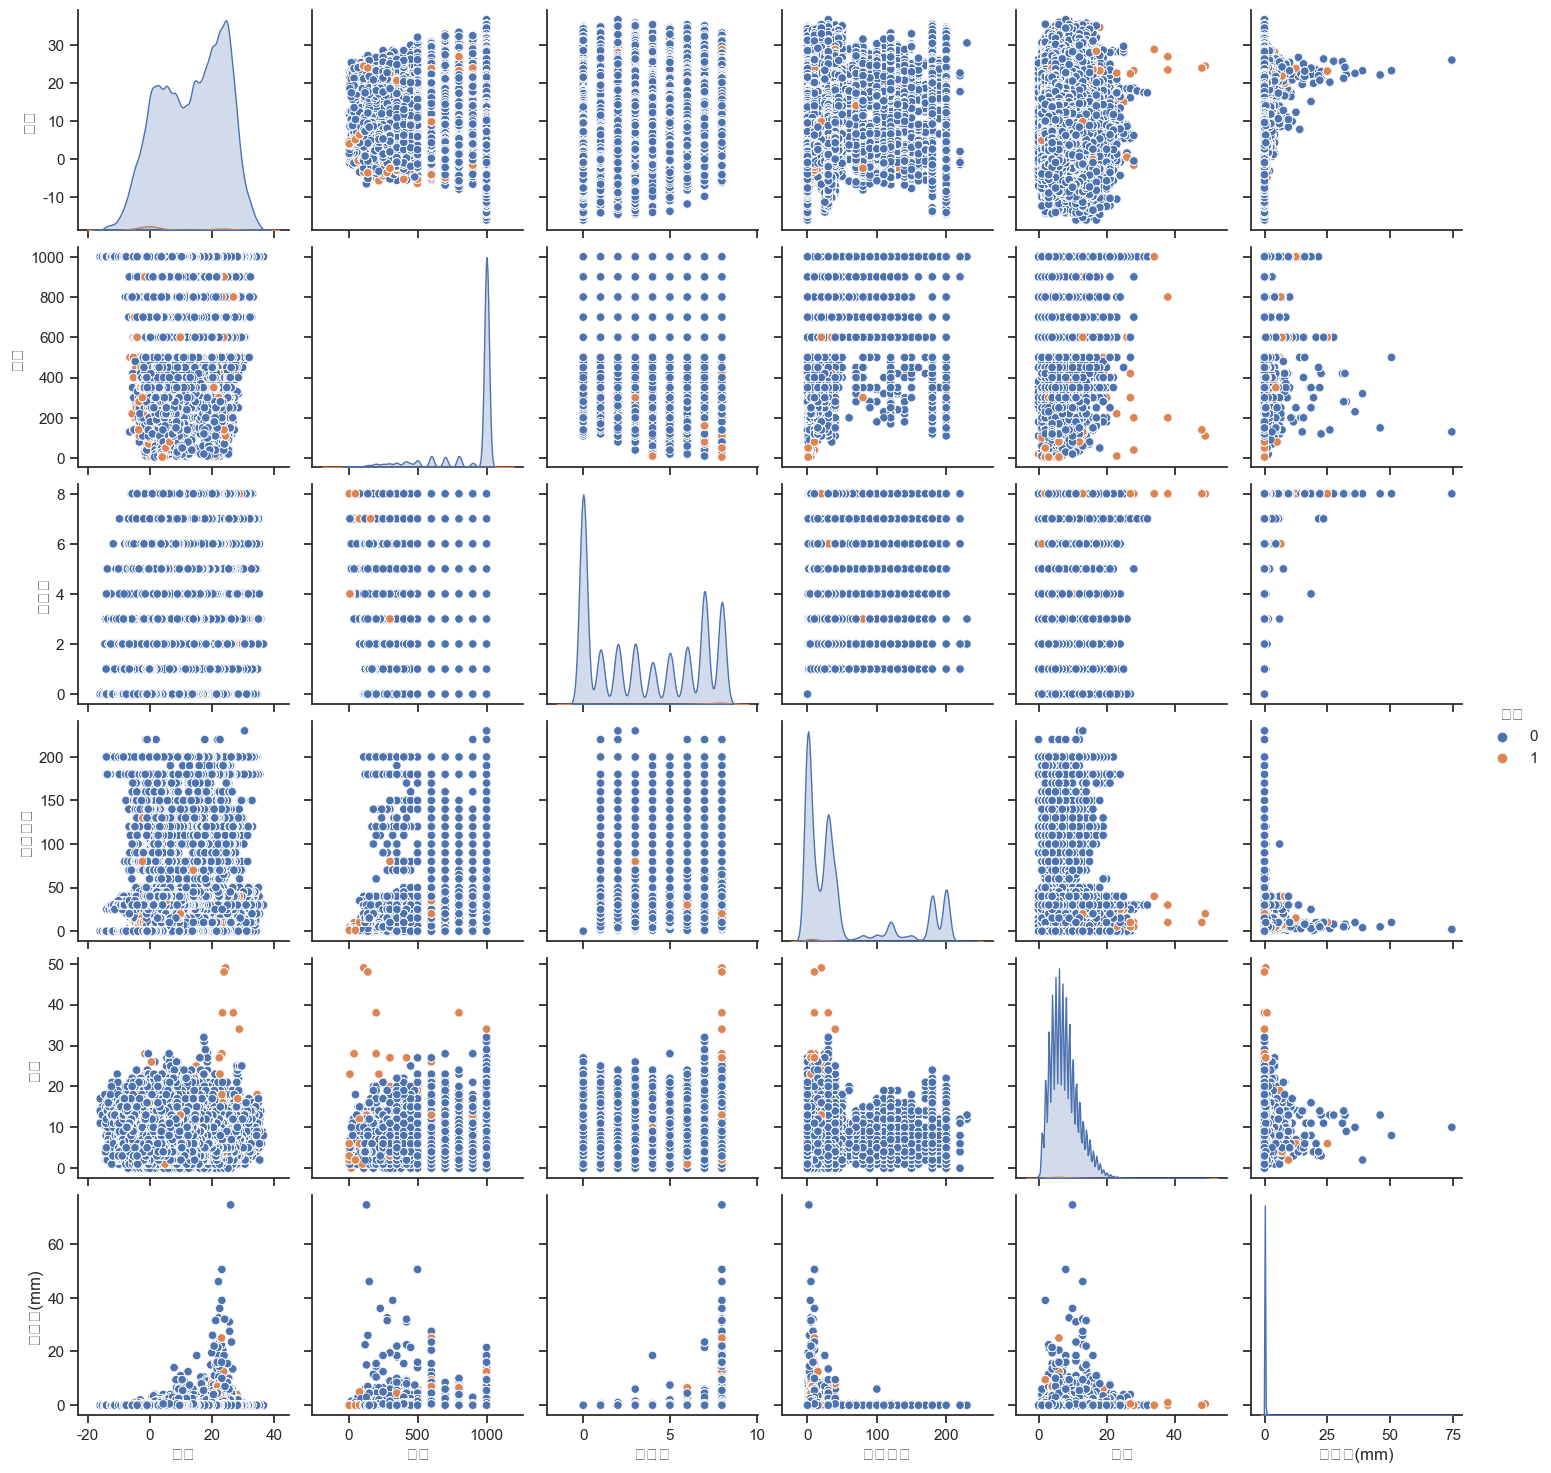


In [21]:
model = sm.OLS(endog=df2['현황'], exog=df2['온도'])
results = model.fit() 
print(results.summary())

model2 = sm.OLS(endog=df2['현황'], exog=df2['시정'])
results2 = model2.fit() 
print(results2.summary())

model3 = sm.OLS(endog=df2['현황'], exog=df2['전운량'])
results3 = model3.fit() 
print(results3.summary())

model4 = sm.OLS(endog=df2['현황'], exog=df2['최저운고'])
results4 = model4.fit() 
print(results4.summary())

model5 = sm.OLS(endog=df2['현황'], exog=df2['풍속'])
results5 = model5.fit() 
print(results5.summary())

model6 = sm.OLS(endog=df2['현황'], exog=df2['강수량(mm)'])
results6 = model6.fit() 
print(results6.summary())

model7 = sm.OLS(endog=df2['현황'], exog=df2[['온도','시정','전운량','최저운고','풍속','강수량(mm)']])
results7 = model7.fit() 
print(results7.summary())

                                 OLS Regression Results                                
Dep. Variable:                     현황   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              1007.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):                   6.83e-221
Time:                        02:47:31   Log-Likelihood:                      4.7421e+05
No. Observations:              537097   AIC:                                 -9.484e+05
Df Residuals:                  537096   BIC:                                 -9.484e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                                 OLS Regression Results                                
Dep. Variable:                     현황   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              1184.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):                   3.62e-259
Time:                        02:47:32   Log-Likelihood:                      4.7430e+05
No. Observations:              537097   AIC:                                 -9.486e+05
Df Residuals:                  537096   BIC:                                 -9.486e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# autoencoder

In [22]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.formula.api as smf
import statsmodels

In [23]:
df3=df2.copy()

In [24]:
print("0은 출발 ,1은 출발이 아닌 값(기상 지연, 기상 취소)")
df3['현황'].value_counts()

0은 출발 ,1은 출발이 아닌 값(기상 지연, 기상 취소)


0    531708
1      5389
Name: 현황, dtype: int64

In [25]:
#데이터 쪼개기 위해서 랜덤으로 섞음
df3 = df3.sample(frac=1, random_state=42)

# Autoencoder에 맞게 데이터 라벨링
-> 정상 데이터 0

-> 비정상 데이터 1

In [26]:
# 데이터 분리
df3_Y=df3[df3['현황']==0]
df3_N=df3[df3['현황']==1]

#클래스변수 제거 (autoencoder는 클래스 변수가 없어야함)
df3_Y.drop(['현황'],axis=1,inplace=True)
df3_N.drop(['현황'],axis=1,inplace=True)



/var/folders/nm/26yk90l550xc1ln38d9jn04r0000gn/T/ipykernel_50090/271141006.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_Y.drop(['현황'],axis=1,inplace=True)
/var/folders/nm/26yk90l550xc1ln38d9jn04r0000gn/T/ipykernel_50090/271141006.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_N.drop(['현황'],axis=1,inplace=True)


In [27]:
from sklearn.preprocessing import MinMaxScaler
# 데이터가 정규분포를 따르지 않기 때문에 MinMaxScaler() 사용
minmax_scaler = MinMaxScaler()
df3_Y = minmax_scaler.fit_transform(df3_Y)
df3_N = minmax_scaler.fit_transform(df3_N)

## 참고) MinMaxScaler이후 데이터 형태

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
#이건 단지 어떻게 scale됐는지 보기 위한 코드
Y=pd.DataFrame(df3_Y,columns=['온도','시정','전운량','최저운고','풍속','강수량(mm)'])
N=pd.DataFrame(df3_N,columns=['온도','시정','전운량','최저운고','풍속','강수량(mm)'])

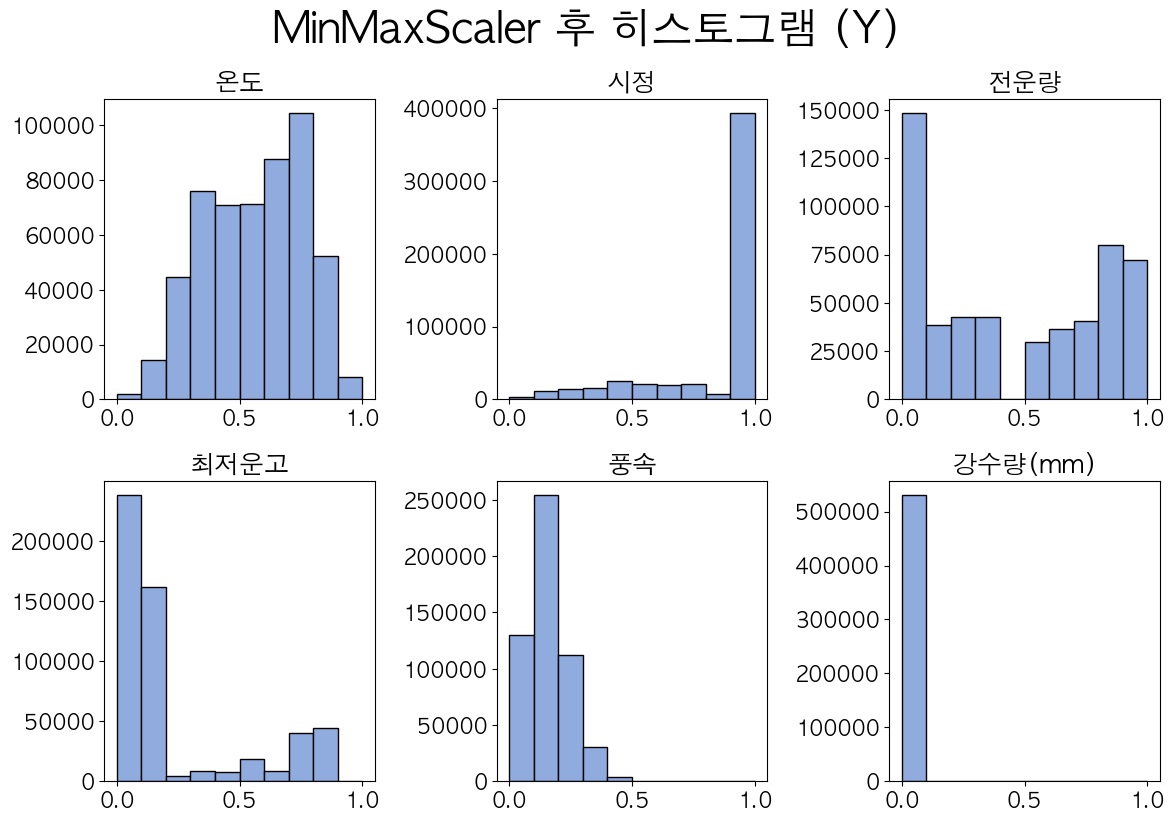

In [29]:
plt.figure(figsize=(12, 12))
plt.suptitle("MinMaxScaler 후 히스토그램 (Y)",fontsize=30,fontweight='bold')
# 서브플롯 생성
bin = [10, 10, 10, 10, 10, 10, 2]  # 이 부분을 임의로 설정했습니다. 원하는 bin 값으로 수정해주세요.
for index, value in enumerate(Y.columns):
    sub = plt.subplot(3, 3, index + 1)
    
    sub.hist([Y[value]], bins=bin[index], facecolor=(144/255, 171/255, 221/255),
             linewidth=1, edgecolor='black')
    plt.title(value)
    plt.tight_layout()  # 서브플롯 간 간격을 자동 조정해주는 함수

# 그림 표시
plt.show()

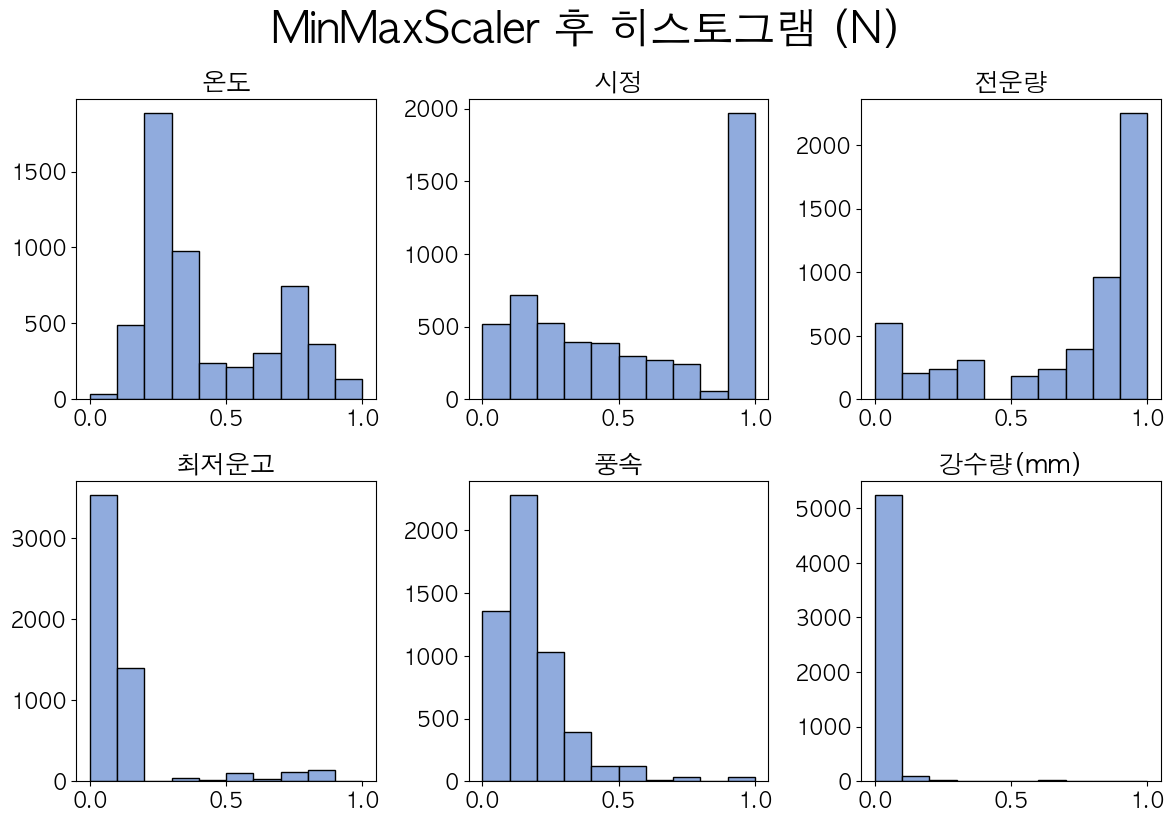

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 새로운 그림(figure) 생성과 크기 설정
plt.figure(figsize=(12, 12))
plt.suptitle("MinMaxScaler 후 히스토그램 (N)",fontsize=30,fontweight='bold')
# 서브플롯 생성
bin = [10, 10, 10, 10, 10, 10, 2]  # 이 부분을 임의로 설정했습니다. 원하는 bin 값으로 수정해주세요.
for index, value in enumerate(N.columns):
    sub = plt.subplot(3, 3, index + 1)
    
    sub.hist([N[value]], bins=bin[index], facecolor=(144/255, 171/255, 221/255),
             linewidth=1, edgecolor='black')
    plt.title(value)
    plt.tight_layout()  # 서브플롯 간 간격을 자동 조정해주는 함수

# 그림 표시
plt.show()

# 모델 구축 (학습)

In [31]:
#학습 데이터와 평가 데이터를 8:2로 분리  (평가데이터는 데이터 구축할때와 분리해야하므로 8:2로 나누었습니다.)


df3_train_Y=df3_Y[:429678]    
df3_test_Y=df3_Y[429678:]
df3_test_N=df3_N



print("양품 학습 데이터셋 개수: ",len(df3_train_Y))
print("양품 평가 데이터셋 개수: ",len(df3_test_Y))
print("불량 평가 데이터셋 개수: ",len(df3_test_N))

양품 학습 데이터셋 개수:  429678
양품 평가 데이터셋 개수:  102030
불량 평가 데이터셋 개수:  5389


In [32]:
from keras.models import Sequential
from keras.layers import Dropout, Dense
#잡음제거 오토인코더 모델 구축

#인코더
dropout_encoder=Sequential([
    Dropout(0.3),
    Dense(15000, activation='relu'),
    Dense(6, activation='relu')
])

#디코더
dropout_decoder=Sequential([
    Dropout(0.3),
    Dense(15000, activation='relu',input_shape=[6]),
    Dense(df3_train_Y.shape[1], activation='sigmoid'),
])

dropout_AE=Sequential([dropout_encoder, dropout_decoder])

In [33]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

#손실함수 옵티마이저 정의
dropout_AE.compile(loss='mse',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])

#모델 훈련
history=dropout_AE.fit(df3_train_Y,df3_train_Y,batch_size=5000, epochs=30, validation_split=0.2,
                      callbacks=[EarlyStopping(monitor='val_loss', patience=7, mode='min')])


Epoch 1/30
69/69 [==============================] - 12s 167ms/step - loss: 0.0775 - accuracy: 0.7819 - val_loss: 0.0566 - val_accuracy: 0.7935
Epoch 2/30
69/69 [==============================] - 12s 167ms/step - loss: 0.0561 - accuracy: 0.7931 - val_loss: 0.0560 - val_accuracy: 0.7935
Epoch 3/30
69/69 [==============================] - 12s 167ms/step - loss: 0.0561 - accuracy: 0.7931 - val_loss: 0.0560 - val_accuracy: 0.7935
Epoch 4/30
69/69 [==============================] - 12s 167ms/step - loss: 0.0561 - accuracy: 0.7931 - val_loss: 0.0559 - val_accuracy: 0.7935
Epoch 5/30
69/69 [==============================] - 11s 165ms/step - loss: 0.0561 - accuracy: 0.7931 - val_loss: 0.0560 - val_accuracy: 0.7935
Epoch 6/30
69/69 [==============================] - 11s 166ms/step - loss: 0.0561 - accuracy: 0.7931 - val_loss: 0.0560 - val_accuracy: 0.7935
Epoch 7/30
69/69 [==============================] - 11s 166ms/step - loss: 0.0561 - accuracy: 0.7931 - val_loss: 0.0560 - val_accuracy: 0.7935

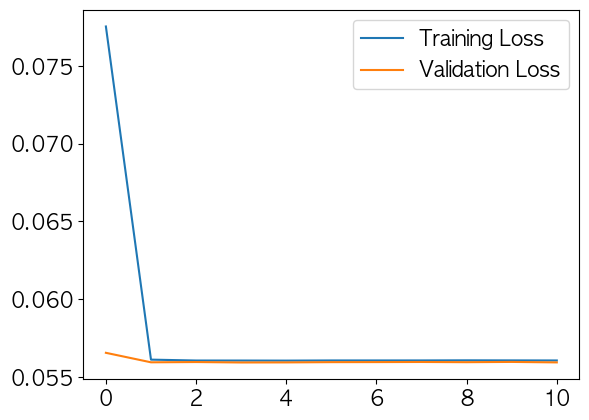

In [34]:

plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

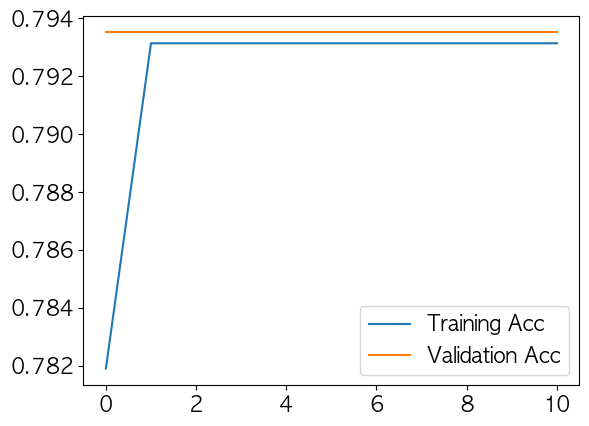

In [35]:
plt.plot(history.history['accuracy'],label='Training Acc')
plt.plot(history.history['val_accuracy'],label='Validation Acc')
plt.legend()
plt.show()

# 모델 결과

In [36]:
import numpy as np
df3_train_pred=dropout_AE.predict(df3_train_Y)
df3_train_loss=np.mean(np.square(df3_train_pred-df3_train_Y),axis=1)
threshold=np.mean(df3_train_loss)+2*np.std(df3_train_loss)
print("복원 오류 임계치: ",threshold)

13428/13428 [==============================] - 10s 726us/step
복원 오류 임계치:  0.11451881633117889


3189/3189 [==============================] - 2s 704us/step


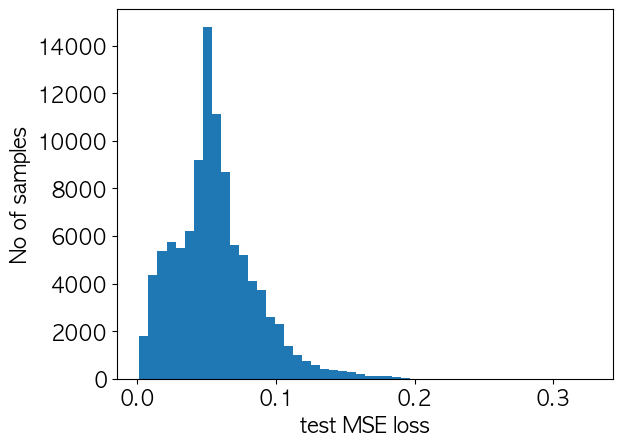

불량 개수 3919


In [37]:
import numpy as np
df3_predict_Y=dropout_AE.predict(df3_test_Y)

df3_test_Y_mse=np.mean(np.square(df3_predict_Y-df3_test_Y),axis=1)

plt.hist(df3_test_Y_mse,bins=50)
plt.xlabel("test MSE loss")
plt.ylabel('No of samples')
plt.show()

df3_test_Y_anomalies=df3_test_Y_mse>threshold
print('불량 개수',np.sum(df3_test_Y_anomalies))

169/169 [==============================] - 0s 782us/step


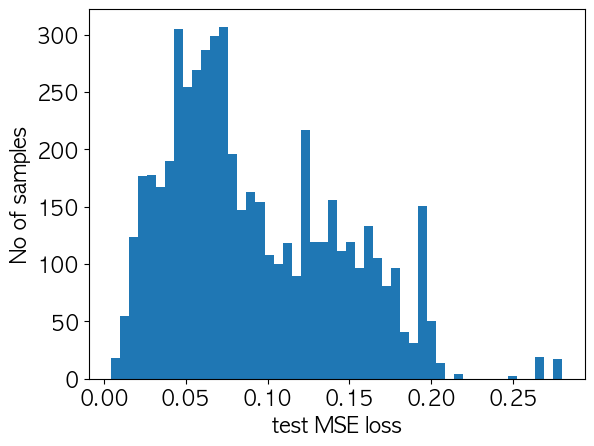

불량 개수 1775


In [38]:
df3_predict_N=dropout_AE.predict(df3_test_N)

df3_test_N_mse=np.mean(np.square(df3_predict_N-df3_test_N),axis=1)

plt.hist(df3_test_N_mse,bins=50)
plt.xlabel("test MSE loss")
plt.ylabel('No of samples')
plt.show()

df3_test_N_anomalies=df3_test_N_mse>threshold
print('불량 개수',np.sum(df3_test_N_anomalies))

In [39]:
df3_true=np.concatenate([np.zeros(len(df3_test_Y_anomalies)),np.ones(len(df3_test_N_anomalies))])
df3_prediction=np.concatenate([df3_test_Y_anomalies,df3_test_N_anomalies])

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df3_true,df3_prediction)

array([[98111,  3919],
       [ 3614,  1775]])

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('정확도: ',accuracy_score(df3_true,df3_prediction))
print('정밀도: ',precision_score(df3_true,df3_prediction))
print('재현율: ',recall_score(df3_true,df3_prediction))
print('F1: ',f1_score(df3_true,df3_prediction))

정확도:  0.9298727413213678
정밀도:  0.3117316473480857
재현율:  0.3293746520690295
F1:  0.3203103852747451


In [42]:
# 모델 구조 출력
print(dropout_AE.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 6)                 195006    
                                                                 
 sequential_1 (Sequential)   (None, 6)                 195006    
                                                                 
Total params: 390012 (1.49 MB)
Trainable params: 390012 (1.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### 번외 ) test data 

-> 혹시 평가데이터 불균형땜에 그런가 싶어서 정상데이터 5389개 비정상데이터 5389개 넣은 값입니다.

정상데이터는 102030개 중 5389개를 골랐습니다.

근데 정상데이터가 줄어서 정상을 비정상으로 판단하는 개수가 줄은거라 중요한 의미는 없는 것 같습니다. 

In [43]:
df3_test_Y=df3_test_Y[5000:10389]
len(df3_test_Y)

5389

In [58]:
import numpy as np

df3_train_pred=dropout_AE.predict(df3_train_Y)
df3_train_loss=np.mean(np.square(df3_train_pred-df3_train_Y),axis=1)
threshold=np.mean(df3_train_loss)+2*np.std(df3_train_loss)
print("복원 오류 임계치: ",threshold)

13428/13428 [==============================] - 10s 712us/step
복원 오류 임계치:  0.11451881633117889


169/169 [==============================] - 0s 795us/step


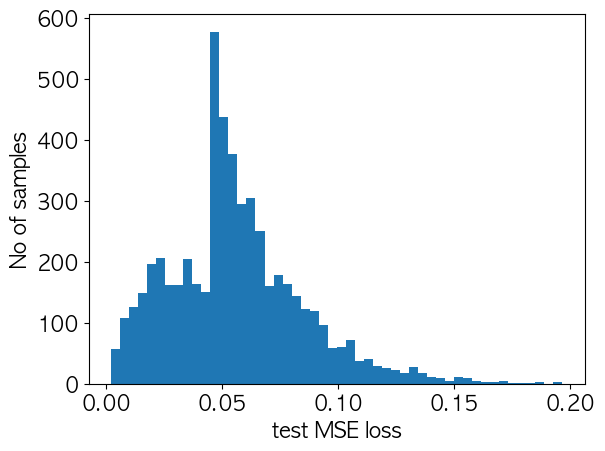

불량 개수 213


In [59]:
import numpy as np
df3_predict_Y=dropout_AE.predict(df3_test_Y)

df3_test_Y_mse=np.mean(np.square(df3_predict_Y-df3_test_Y),axis=1)

plt.hist(df3_test_Y_mse,bins=50)
plt.xlabel("test MSE loss")
plt.ylabel('No of samples')
plt.show()

df3_test_Y_anomalies=df3_test_Y_mse>threshold
print('불량 개수',np.sum(df3_test_Y_anomalies))

169/169 [==============================] - 0s 779us/step


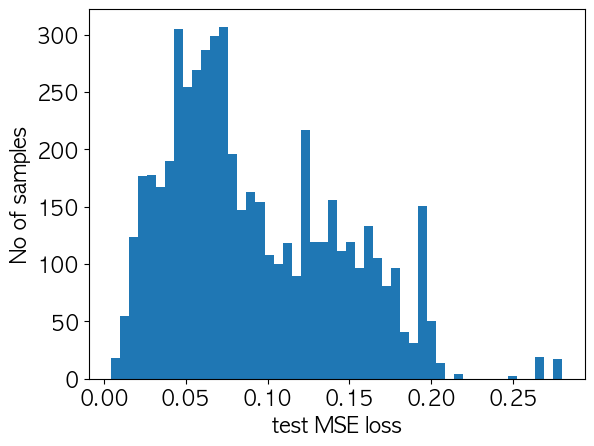

불량 개수 1775


In [60]:
df3_predict_N=dropout_AE.predict(df3_test_N)

df3_test_N_mse=np.mean(np.square(df3_predict_N-df3_test_N),axis=1)

plt.hist(df3_test_N_mse,bins=50)
plt.xlabel("test MSE loss")
plt.ylabel('No of samples')
plt.show()

df3_test_N_anomalies=df3_test_N_mse>threshold
print('불량 개수',np.sum(df3_test_N_anomalies))

In [61]:
df3_true=np.concatenate([np.zeros(len(df3_test_Y_anomalies)),np.ones(len(df3_test_N_anomalies))])
df3_prediction=np.concatenate([df3_test_Y_anomalies,df3_test_N_anomalies])

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df3_true,df3_prediction)

array([[5176,  213],
       [3614, 1775]])

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('정확도: ',accuracy_score(df3_true,df3_prediction))
print('정밀도: ',precision_score(df3_true,df3_prediction))
print('재현율: ',recall_score(df3_true,df3_prediction))
print('F1: ',f1_score(df3_true,df3_prediction))

정확도:  0.644924846910373
정밀도:  0.8928571428571429
재현율:  0.3293746520690295
F1:  0.4812254303917582
